# Entrenamiento de modelos, evaluación y selección.

**Elaborado por:** Jacqueline Fernández Ramírez, Jazmín Fernández Ramírez y Nina Odoux.

Máster universitario de Ciencia de Datos (MUCD) - CUNEF Universidad.

### La Importancia de entrenar, evaluar y seleccionar:

Desarrollar un modelo efectivo de machine learning requiere entrenar, evaluar y seleccionar cuidadosamente el modelo con mejor rendimiento. El entrenamiento permite que el modelo aprenda patrones a partir de los datos, la evaluación asegura que generalice bien a datos nuevos, y la selección identifica la solución más confiable y robusta. Juntos, estos pasos garantizan que el modelo final ofrezca resultados precisos y consistentes, abordando el problema de manera efectiva y maximizando su aplicabilidad en el mundo real.

* Entrenar: Es donde el modelo aprende patrones de los datos. Esto le permite hacer predicciones precisas y generalizar a nuevos datos.

* Evaluar: Comprobamos si el modelo funciona bien con datos nuevos usando métricas adaptadas. Esto evita que el modelo sea poco confiable.

* Seleccionar: Comparamos varios modelos para elegir el más efectivo y balanceado para el problema.

Siguiendo estos pasos, garantizamos un modelo que sea útil y fiable en el mundo real.l



In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
seed = np.random.seed(123)
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from boruta import BorutaPy 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Lectura de los dataset

In [3]:
# Cargar el dataset
X_train = pd.read_csv("../data/preprocessed_data/X_train_final.csv")
X_test = pd.read_csv("../data/preprocessed_data/X_test_final.csv")
y_train =pd.read_csv("../data/preprocessed_data/y_train.csv")
y_test =pd.read_csv("../data/preprocessed_data/y_test.csv")

## Oversampling - SMOTE

El principal objetivo del oversampling es aumentar la representación de la clase minoritaria en el conjunto de datos, creando copias adicionales de las instancias de esta clase. Esto se logra mediante técnicas como Random Oversampling o **Synthetic Minority Over-sampling Technique (SMOTE)**. Al hacerlo, se busca:

* Mejorar la Predicción de la Clase Minoritaria: Los modelos tienden a estar sesgados hacia la clase mayoritaria debido a su preponderancia en los datos. Al equilibrar las clases, el modelo puede aprender mejor las características de la clase minoritaria, mejorando así su capacidad de predicción.

* Evitar el Sesgo del Modelo: Un conjunto de datos desbalanceado puede llevar a que el modelo simplemente prediga siempre la clase mayoritaria, obteniendo una precisión superficialmente alta, pero sin valor práctico. El oversampling ayuda a que el modelo sea más justo y equitativo en sus predicciones.

* Mejorar las Métricas de Evaluación: Al tener un conjunto de datos más equilibrado, las métricas de evaluación como el ROC-AUC, F1-score, precisión y recall serán más representativas del rendimiento real del modelo.

**Justificación como primer paso:**

Antes de iniciar con la selección del modelo, es crucial abordar el desbalance de los datos. Esto asegura que el modelo tenga la oportunidad de aprender de manera efectiva las características de todas las clases. Implementar el oversampling como primer paso permite que, durante el entrenamiento y evaluación, el modelo tenga acceso a un conjunto de datos equilibrado, facilitando una selección de modelos y parámetros más precisa y justa

In [8]:
# Corregir el formato de y_train
y_train = y_train.squeeze()  # Convierte el DataFrame a un pd.Series si es necesario
y_train = y_train.astype(int)  # Asegura que los valores sean enteros

# Verificar la distribución antes del oversampling
print("Distribución antes del oversampling:", Counter(y_train))

# Aplicar SMOTE
smote = SMOTE(random_state=seed)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución después del oversampling
print("Distribución después del oversampling:", Counter(y_train_balanced))

# Mostrar las dimensiones después del oversampling
print(f"Nuevas dimensiones de X_train: {X_train_balanced.shape}")
print(f"Nuevas dimensiones de y_train: {y_train_balanced.shape}")


Distribución antes del oversampling: Counter({0: 226148, 1: 19860})
Distribución después del oversampling: Counter({0: 226148, 1: 226148})
Nuevas dimensiones de X_train: (452296, 72)
Nuevas dimensiones de y_train: (452296,)


Los resultados obtenidos son coherentes y muestran que el oversampling se aplicó correctamente. Ahora, las clases tienen un número equitativo de registros, lo que permite que los modelos de machine learning aprendan de manera más equilibrada y precisa para ambas clases.

Además, dado que los datos de prueba (X_test y y_test) no se modificaron durante el proceso, se garantiza que la evaluación de los modelos será justa y libre de sesgos. Esto asegura una validación más precisa de los modelos desarrollados.

## Ejemplo de elección del modelo con un subjconjunto del dataset 

In [21]:
# Tomar un subconjunto aleatorio de 1000 observaciones
X_train_subset = X_train_balanced.sample(n=10000, random_state=seed)
X_test_subset = X_test.sample(n=10000, random_state=seed)
y_train_subset =y_train_balanced.sample(n=10000, random_state=seed)
y_test_subset =y_test.sample(n=10000, random_state=seed)

Evaluando modelo: Logistic Regression (GLM)
Logistic Regression (GLM) - CV F1 Score: 0.5021 ± 0.0173
Evaluando modelo: Random Forest
Random Forest - CV F1 Score: 0.4769 ± 0.0033
Evaluando modelo: XGBoost
XGBoost - CV F1 Score: 0.4889 ± 0.0128
Evaluando modelo: LightGBM
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 3961, number of negative: 4039
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14467
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495125 -> initscore=-0.019501
[LightGBM] [Info] Start training from score -0.0

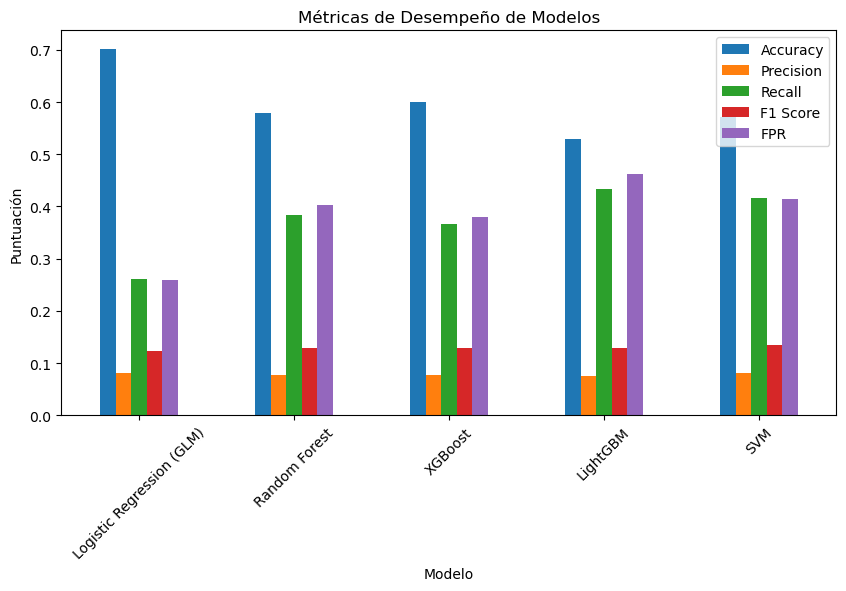

In [23]:
# Definir modelos
models = {
    "Logistic Regression (GLM)": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=seed),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=seed),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss', random_state=seed),
    "LightGBM": LGBMClassifier(n_estimators=100, num_leaves=31, learning_rate=0.1, random_state=seed, min_data_in_leaf=20),
    "SVM": SVC(probability=True, kernel='rbf', C=1.0, class_weight='balanced', random_state=seed)
}

# Diccionario para almacenar resultados
results = {}
trained_models = {}

# Evaluar cada modelo
for name, model in models.items():
    print(f"Evaluando modelo: {name}")
    
    # Crear pipeline con escalado y modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Estandarizar los datos
        ('classifier', model)
    ])
    
    # Validación cruzada (5-fold) usando F1-score como métrica
    cv_scores = cross_val_score(pipeline, X_train_subset, y_train_subset, cv=5, scoring='f1')
    print(f"{name} - CV F1 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Entrenar el modelo con los datos de entrenamiento
    pipeline.fit(X_train_subset, y_train_subset)
    
    # Guardar el modelo entrenado
    trained_models[name] = pipeline
    
    # Predicciones en el conjunto de prueba
    y_pred = pipeline.predict(X_test_subset)
    
    # Calcular métricas en el conjunto de prueba
    accuracy = accuracy_score(y_test_subset, y_pred)
    precision = precision_score(y_test_subset, y_pred, zero_division=0)
    recall = recall_score(y_test_subset, y_pred, zero_division=0)
    f1 = f1_score(y_test_subset, y_pred, zero_division=0)
    
    # Calcular matriz de confusión y FPR
    tn, fp, fn, tp = confusion_matrix(y_test_subset, y_pred).ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evitar división por cero
    
    # Guardar métricas
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'FPR': fpr  # Tasa de Falsos Positivos
    }

# Convertir resultados a un DataFrame para visualizar
results_df = pd.DataFrame(results).T

# Mostrar resultados finales
print("\nComparación de Modelos:")
print(results_df)

# Graficar las métricas de los modelos
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'FPR']].plot(kind='bar', figsize=(10, 5))
plt.title('Métricas de Desempeño de Modelos')
plt.ylabel('Puntuación')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

**Justificación del subconjunto de datos:**

Utilizar un subconjunto de 10,000 registros es una estrategia eficiente para realizar pruebas iniciales y ajustes de hiperparámetros de manera más rápida y efectiva. Este enfoque permite obtener una visión general del rendimiento de cada modelo sin consumir excesivos recursos computacionales o tiempo. Una vez que se identifiquen los modelos más prometedores, estos se pueden entrenar y evaluar nuevamente utilizando el conjunto de datos completo, logrando así una evaluación más precisa y robusta. Esta estrategia asegura que solo los modelos mejor ajustados y con mayor potencial sean sometidos a un entrenamiento a gran escala, optimizando el proceso de selección y evaluación de modelos.

**Validación cruzada y machine learning:**

La validación cruzada es un componente esencial en la construcción de modelos de machine learning, ya que garantiza que los modelos se generalicen bien a datos no vistos y ayuda a prevenir el sobreajuste. Al emplear técnicas como la validación cruzada y el cálculo de múltiples métricas, se asegura una evaluación completa y equitativa del rendimiento de cada modelo. Esto permite una toma de decisiones informada y basada en datos sólidos.

## Ajuste de hiperparámetros

Evaluando modelo: Logistic Regression (GLM)
Evaluando modelo: Random Forest
Evaluando modelo: XGBoost
Evaluando modelo: LightGBM
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 3961, number of negative: 4039
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14467
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495125 -> initscore=-0.019501
[LightGBM] [Info] Start training from score -0.019501
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [W

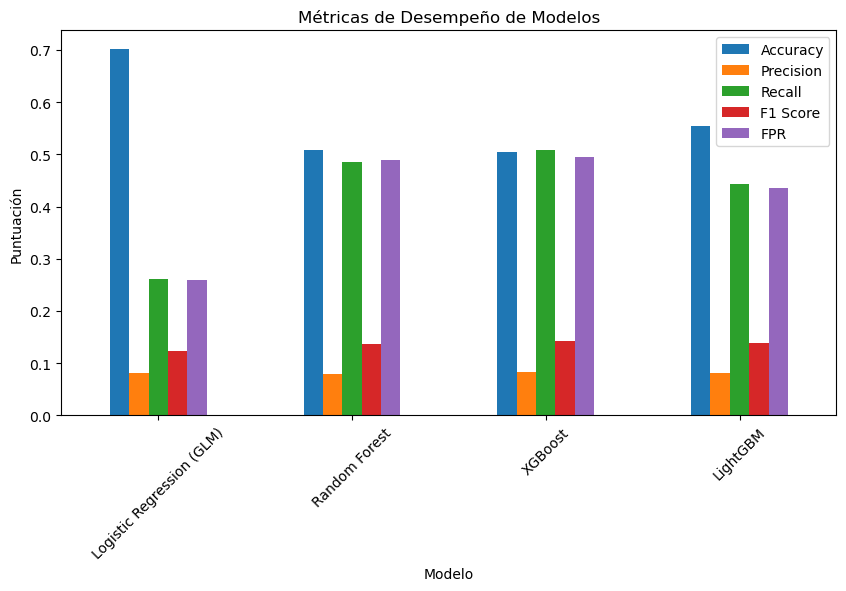

In [30]:
# Definir los modelos y los parámetros para Grid Search
models = {
    "Logistic Regression (GLM)": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=seed),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=seed),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=seed),  # Sin use_label_encoder
    "LightGBM": LGBMClassifier(random_state=seed, min_data_in_leaf=20, num_leaves=31)  # Añadir LightGBM
}

param_grid= {
    "Logistic Regression (GLM)": {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear'],
        'classifier__penalty': ['l2']
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0],
        'classifier__colsample_bytree': [0.8, 1.0]
    },
    "LightGBM": {
        'classifier__n_estimators': [100, 200],
        'classifier__num_leaves': [15, 31, 63],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [-1, 10, 20],
        'classifier__min_data_in_leaf': [10, 20]
    }
}

# Diccionario para almacenar resultados
results = {}

# Evaluar cada modelo con Grid Search
for name, model in models.items():
    print(f"Evaluando modelo: {name}")
    
    # Crear pipeline con escalado y modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Estandarizar los datos
        ('classifier', model)
    ])
    
    # Realizar Grid Search
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='f1')
    grid_search.fit(X_train_subset, y_train_subset)
    
    # Mejor modelo encontrado
    best_model = grid_search.best_estimator_
    
    # Predicciones en el conjunto de prueba
    y_pred = best_model.predict(X_test_subset)
    
    # Calcular métricas en el conjunto de prueba
    accuracy = accuracy_score(y_test_subset, y_pred)
    precision = precision_score(y_test_subset, y_pred, zero_division=0)
    recall = recall_score(y_test_subset, y_pred, zero_division=0)
    f1 = f1_score(y_test_subset, y_pred, zero_division=0)
    
    # Calcular matriz de confusión y FPR
    tn, fp, fn, tp = confusion_matrix(y_test_subset, y_pred).ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evitar división por cero
    
    # Guardar métricas
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'FPR': fpr  # Tasa de Falsos Positivos
    }

# Convertir resultados a un DataFrame para visualizar
results_df = pd.DataFrame(results).T

# Mostrar resultados finales
print("\nComparación de Modelos:")
print(results_df)

# Graficar las métricas de los modelos
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'FPR']].plot(kind='bar', figsize=(10, 5))
plt.title('Métricas de Desempeño de Modelos')
plt.ylabel('Puntuación')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

* **Selección preliminar de modelos:**
  
Para predecir si un cliente se retrasará en el pago de su préstamo, se ha identificado que el modelo debe ofrecer un equilibrio óptimo entre un alto recall y un bajo FPR, acorde a las prioridades del negocio.

* **LightGBM**
  
Basándose en los análisis previos y las métricas observadas, LightGBM se destaca como una elección sólida. Presenta una precisión y recall bastante altos, lo que demuestra su eficacia para detectar clientes con riesgo de retraso. Además, su FPR es moderado, sugiriendo un buen balance entre precisión y reducción de falsos positivos. LightGBM es conocido por su eficiencia en el manejo de grandes conjuntos de datos, lo que lo convierte en una opción confiable.

* **Random Forest**
  
Por otra parte, Random Forest muestra un rendimiento competitivo en términos de recall. Aunque su FPR es aceptable, su capacidad para identificar correctamente los casos de riesgo lo hace viable. Este modelo se evaluará más a fondo junto con LightGBM para determinar cuál ofrece un mejor equilibrio según las necesidades específicas del negocio.

Estos dos modelos, Random Forest y LightGBM, se destacan debido a su capacidad para identificar correctamente los casos de riesgo (alto Recall) y mantener un buen equilibrio entre Recall y Precision (F1 Score). Aunque el FPR de ambos no es el más bajo, su desempeño en Recall y F1 Score los convierte en las mejores opciones para este análisis.

# Prueba de los modelos con las mejores métricas con el dataset completo

**Evaluación de las métricas:**

En el análisis del conjunto de datos, especialmente al predecir eventos críticos como el incumplimiento de préstamos y retrasos de pago, se ha decidido enfocar en ciertas métricas clave para evaluar el rendimiento de los modelos. A continuación, se explica por qué el recall, la precisión, el F1 score y la tasa de falsos positivos (FPR) son las métricas más importantes en esta elección.

**Recall**
El recall es fundamental porque mide la capacidad del modelo para identificar correctamente los préstamos que tendrán retraso en el pago. Un alto recall es crucial para minimizar el riesgo financiero, ya que no detectar un retraso puede resultar en pérdidas significativas.

**Precisión**
La precisión indica cuántas de las predicciones de retraso en el pago del modelo son realmente correctas. Una alta precisión es esencial para evitar falsos positivos, que pueden llevar a decisiones erróneas como rechazar préstamos a clientes solventes, afectando la satisfacción del cliente y la eficiencia operativa.

**F1 Score**
El F1 score proporciona un equilibrio entre precisión y recall. Es especialmente útil en datasets desbalanceados, como en problemas de retraso en el pago de préstamos. Un alto F1 score asegura que el modelo sea robusto y confiable.

**Tasa de Falsos Positivos (FPR)**
La FPR mide la proporción de instancias negativas clasificadas incorrectamente como positivas. En el contexto bancario, un alto FPR puede significar que muchos clientes solventes son clasificados incorrectamente como riesgosos, afectando la relación con los clientes y la rentabilidad del banco.

Cabe mencionar que, es crucial enfocarse en el recall, la precisión, el F1 score y la tasa de falsos positivos (FPR). Estas métricas proporcionan una evaluación completa y equilibrada del rendimiento del modelo, asegurando que se identifiquen correctamente los casos de retraso en el pago y se minimicen los errores de clasificación. Elegir las métricas adecuadas garantiza que el modelo sea efectivo y confiable en la toma de decisiones críticas para el negocio bancario.

## Evaluación de los modelos

In [12]:
# Definir los modelos y los parámetros para RandomizedSearchCV
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=seed),
    "LightGBM": LGBMClassifier(random_state=seed, min_data_in_leaf=20, num_leaves=31)
}

param_distributions = {
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    "LightGBM": {
        'classifier__n_estimators': [100, 200],
        'classifier__num_leaves': [15, 31, 63],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [-1, 10, 20],
        'classifier__min_data_in_leaf': [10, 20]
    }
}

# Diccionario para almacenar resultados
results = {}

# Evaluar cada modelo con RandomizedSearchCV
for name, model in models.items():
    print(f"Evaluando modelo: {name}")
    
    # Crear pipeline con escalado y modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Estandarizar los datos
        ('classifier', model)
    ])
    
    # Realizar Randomized Search
    randomized_search = RandomizedSearchCV(pipeline, param_distributions[name], n_iter=10, cv=5, scoring='f1', verbose=2, random_state=seed)
    randomized_search.fit(X_train, y_train)
    
    # Mejor modelo encontrado
    best_model = randomized_search.best_estimator_
    
    # Predicciones en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    
    # Calcular métricas en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Calcular matriz de confusión y FPR
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evitar división por cero
    
    # Guardar métricas
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'FPR': fpr  # Tasa de Falsos Positivos
    }

# Convertir resultados a un DataFrame para visualizar
results_df = pd.DataFrame(results).T

# Mostrar resultados finales
print("\nComparación de Modelos:")
print(results_df)

# Graficar las métricas de los modelos
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'FPR']].plot(kind='bar', figsize=(8, 5))
plt.title('Métricas de Desempeño de Modelos')
plt.ylabel('Puntuación')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

Evaluando modelo: Random Forest
Evaluando modelo: LightGBM


KeyboardInterrupt: 

In [ ]:
import joblib

# Diccionario de modelos
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=seed),
    "LightGBM": LGBMClassifier(random_state=seed, min_data_in_leaf=20, num_leaves=31)
}

# Parámetros para RandomizedSearchCV
param_distributions = {
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    "LightGBM": {
        'classifier__n_estimators': [100, 200],
        'classifier__num_leaves': [15, 31, 63],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [-1, 10, 20],
        'classifier__min_data_in_leaf': [10, 20]
    }
}

# Guardar los mejores modelos
best_models = {}

for name, model in models.items():
    print(f"Evaluando modelo: {name}")
    
    # Crear pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Configurar RandomizedSearchCV
    randomized_search = RandomizedSearchCV(
        pipeline, 
        param_distributions[name], 
        n_iter=10, 
        cv=5, 
        scoring='f1', 
        verbose=2, 
        random_state=seed
    )
    randomized_search.fit(X_train, y_train)
    
    # Guardar el mejor modelo
    best_models[name] = randomized_search.best_estimator_
    
    # Guardar en disco
    joblib.dump(randomized_search.best_estimator_, f'best_model_{name.lower().replace(" ", "_")}.pkl')
    print(f"Modelo {name} guardado como 'best_model_{name.lower().replace(' ', '_')}.pkl'")

# Comprobación al cargar modelos
loaded_model_rf = joblib.load('../models/best_model_random_forest.pkl')
loaded_model_lgb = joblib.load('../models/best_model_lightgbm.pkl')

# Validar las clases del modelo
print(type(loaded_model_rf))  # Debe ser Pipeline
print(type(loaded_model_lgb))  # Debe ser Pipeline

## Selección final del modelo

## Guardado del modelo en Pickle